<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/Spread1_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [3]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

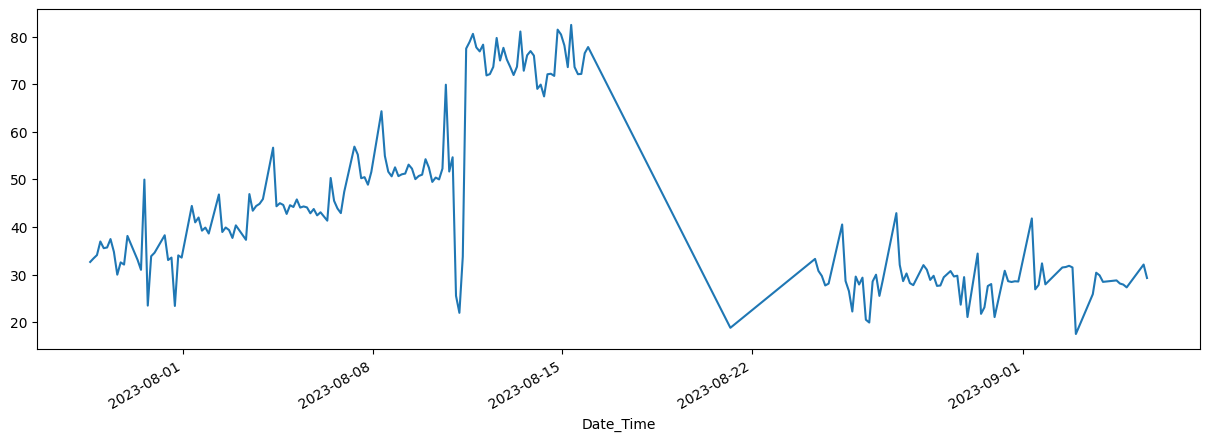

In [9]:
df = pd.read_csv('GT data for 3-hour intervel learning1.csv', index_col='Date_Time', parse_dates=True)
df[-200:]["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

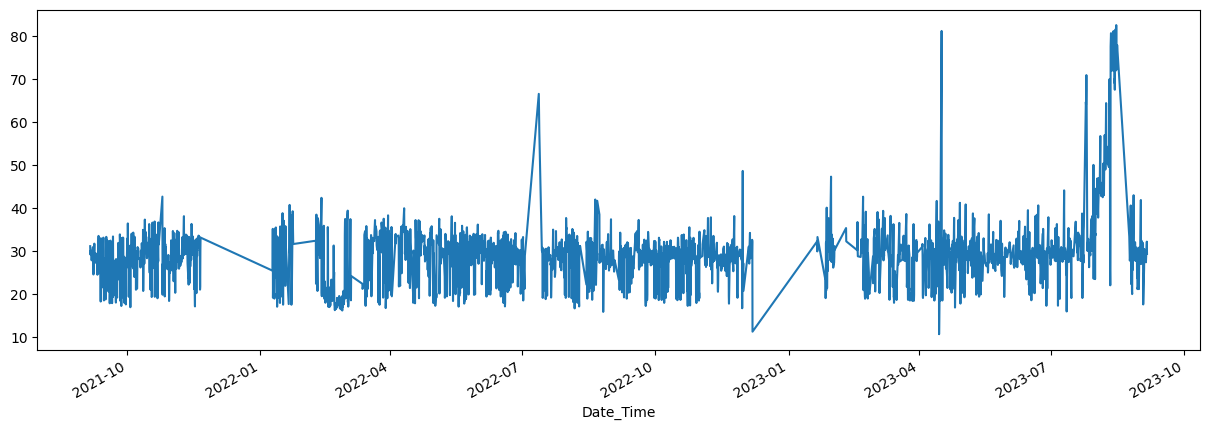

In [8]:
df[df["GT Baseload Power Output Expected"]>200]["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [ ]:
df.columns = ['y']
df['ds'] = df.index

In [ ]:
df.head()

,y,ds
Date_Time,,
2023-07-21 11:10:14,627.017090,2023-07-21 11:10:14
2023-07-21 11:11:14,627.486267,2023-07-21 11:11:14
2023-07-21 11:12:14,627.759399,2023-07-21 11:12:14
2023-07-21 11:13:14,626.793579,2023-07-21 11:13:14
2023-07-21 11:14:14,625.827820,2023-07-21 11:14:14


In [ ]:
df.tail()

,y,ds
Date_Time,,
2023-07-27 11:06:14,634.321411,2023-07-27 11:06:14
2023-07-27 11:07:14,633.971558,2023-07-27 11:07:14
2023-07-27 11:08:14,633.971558,2023-07-27 11:08:14
2023-07-27 11:09:14,634.245300,2023-07-27 11:09:14
2023-07-27 11:10:14,635.874023,2023-07-27 11:10:14


In [ ]:
m = Prophet()

In [ ]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/i8i__ojs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/lbinugdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66994', 'data', 'file=/tmp/tmpb_avzv7u/i8i__ojs.json', 'init=/tmp/tmpb_avzv7u/lbinugdl.json', 'output', 'file=/tmp/tmpb_avzv7u/prophet_model7t28m3gl/prophet_model-20231016064827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=60, freq = '1min')

In [ ]:
future.tail()

,ds
8696,2023-07-27 12:06:14
8697,2023-07-27 12:07:14
8698,2023-07-27 12:08:14
8699,2023-07-27 12:09:14
8700,2023-07-27 12:10:14


In [ ]:
forecast = m.predict(future)

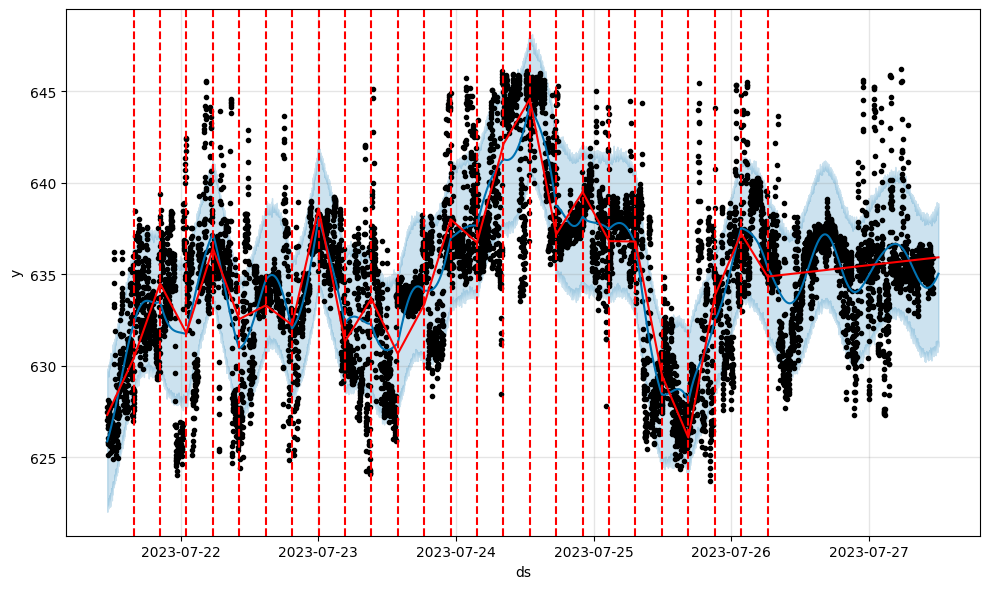

In [ ]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

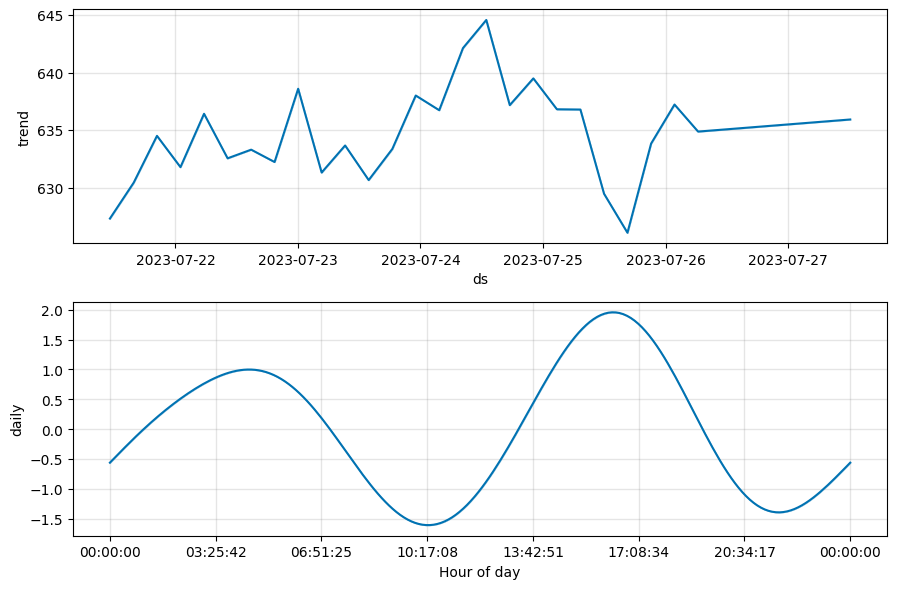

In [ ]:
m.plot_components(forecast);

In [ ]:
m2 = Prophet(seasonality_mode='multiplicative')

In [ ]:
m2.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/8_0a86ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/3npcwsns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39170', 'data', 'file=/tmp/tmpb_avzv7u/8_0a86ks.json', 'init=/tmp/tmpb_avzv7u/3npcwsns.json', 'output', 'file=/tmp/tmpb_avzv7u/prophet_modelzafhtt9a/prophet_model-20231016064838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m2.make_future_dataframe(periods=60, freq = '1min')

In [ ]:
forecast = m2.predict(future)

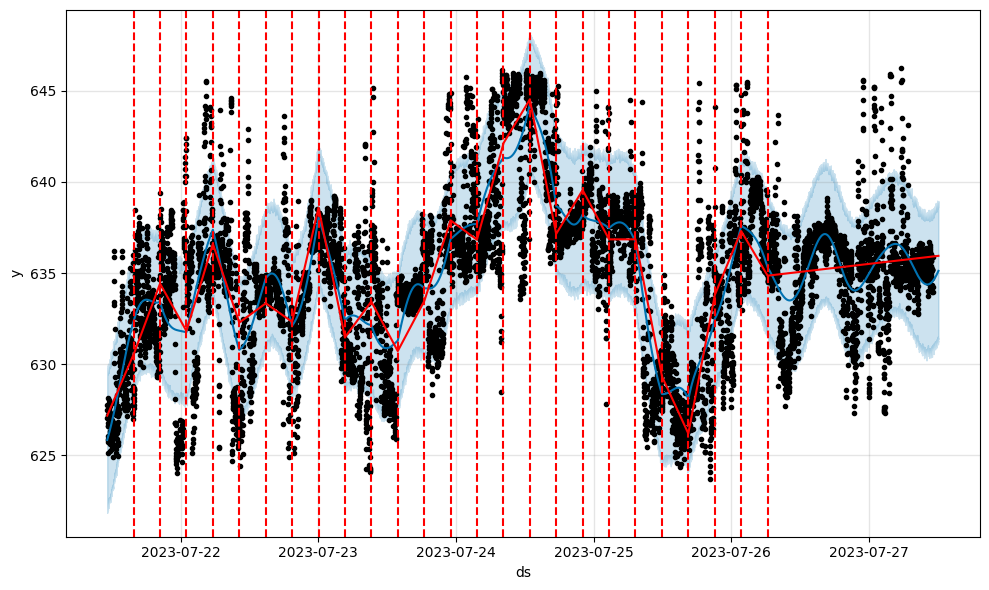

In [ ]:
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

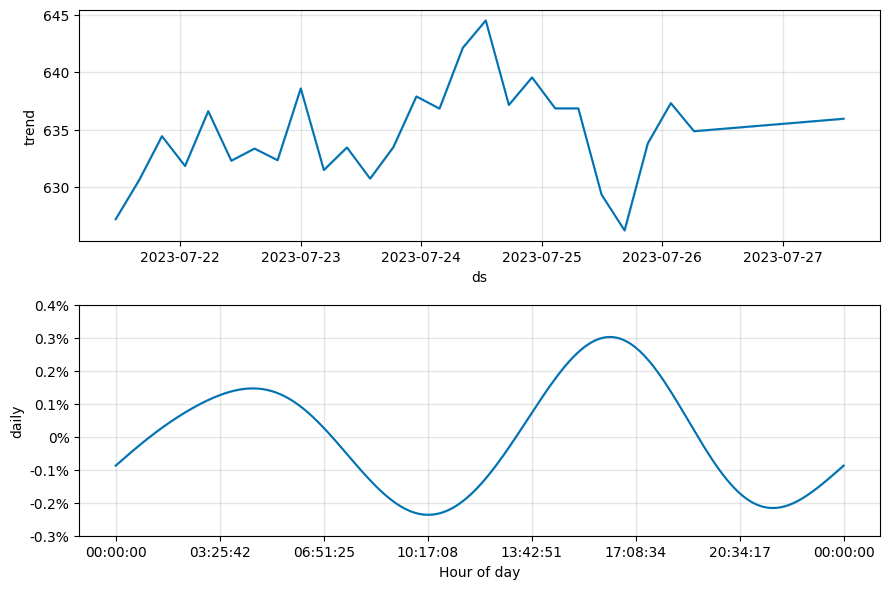

In [ ]:
m2.plot_components(forecast);

In [ ]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])

In [ ]:
m3 = Prophet()

In [ ]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/ymn0y7wa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_avzv7u/9n196h9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70290', 'data', 'file=/tmp/tmpb_avzv7u/ymn0y7wa.json', 'init=/tmp/tmpb_avzv7u/9n196h9g.json', 'output', 'file=/tmp/tmpb_avzv7u/prophet_modelissotw_t/prophet_model-20231016064851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m3.make_future_dataframe(periods=400, freq = '1min')

In [ ]:
forecast = m3.predict(future)

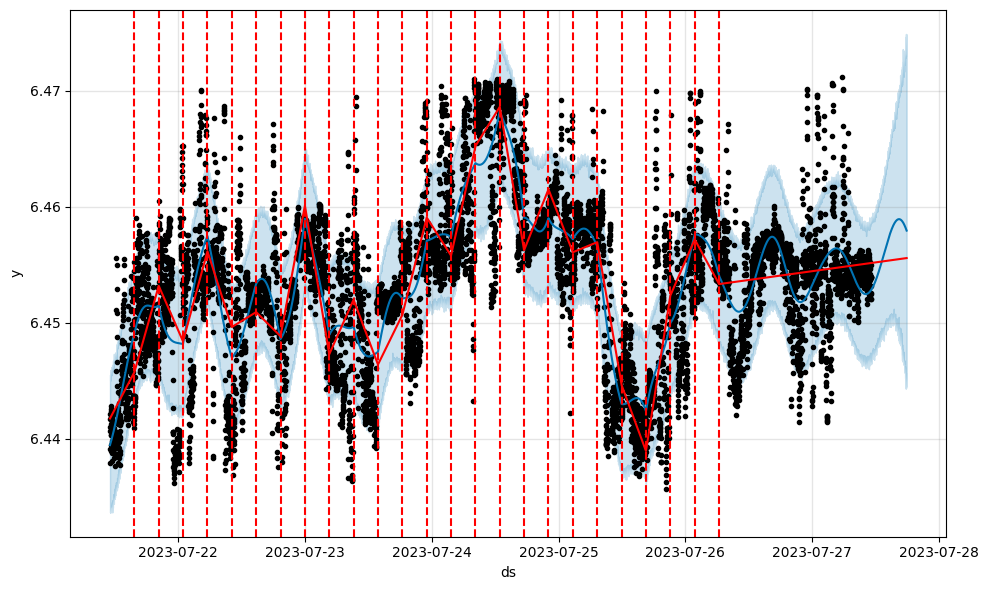

In [ ]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

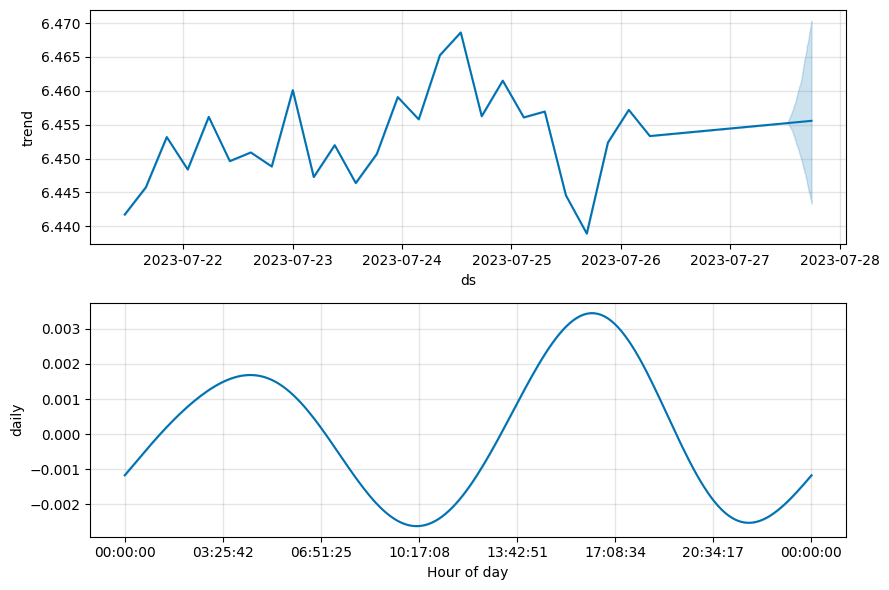

In [ ]:
m3.plot_components(forecast);